In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import requests

In [2]:
df = pd.read_csv("food-consumption.csv").dropna().reset_index(drop=True)
X = df.iloc[:,1:].as_matrix()
m,n = X.shape

/home/jfftilton/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
r = requests.get("https://restcountries.eu/rest/v2/region/europe")
countries = r.json()

regions = {c:{} for c in df["Country"]}

for c in countries:
    if c["name"] in regions.keys():
        regions[c["name"]] = c["subregion"]
    

regions["Holland"] = 'Western Europe'
regions["England"] = "Northern Europe"
regions = [v for k,v in regions.items()]

In [25]:
# step 1: estimate the mean and covariance matrix
mu = np.mean(X,axis =0).reshape(1,20)
X_scaled = np.subtract(X,mu)
C = np.dot(X_scaled.T,X_scaled)/m
# step 2: perform eigendecomposition on the covariance matrix
w, v = np.linalg.eig(C)
# Order the data
idx = w.argsort()[::-1]
principal_directions = v[:,idx]
# step 3: Compute reduced Representation
principal_components = np.dot(X_scaled/np.sqrt(w[idx].reshape(1,20)),principal_directions.T)

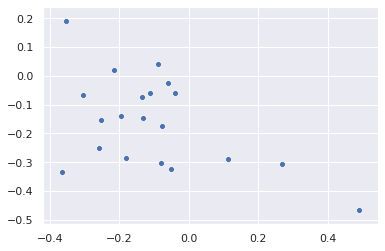

In [26]:
ax = sns.scatterplot(x=principal_directions[:,0], y=principal_directions[:,1])

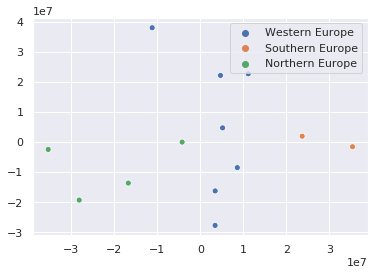

In [27]:
ax = sns.scatterplot(x=pc1, y=pc2, hue=regions)